In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

data = pd.read_csv('/Users/arm2/Downloads/Python for Finance and Investment (Udemy)/Gold Price from 2018 to 2023-10-31.csv', index_col = 'Date')

In [2]:
log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,Adj Close
Date,
24-10-2023,-0.000658
25-10-2023,0.004597
26-10-2023,0.001561
27-10-2023,0.000704
30-10-2023,0.003814


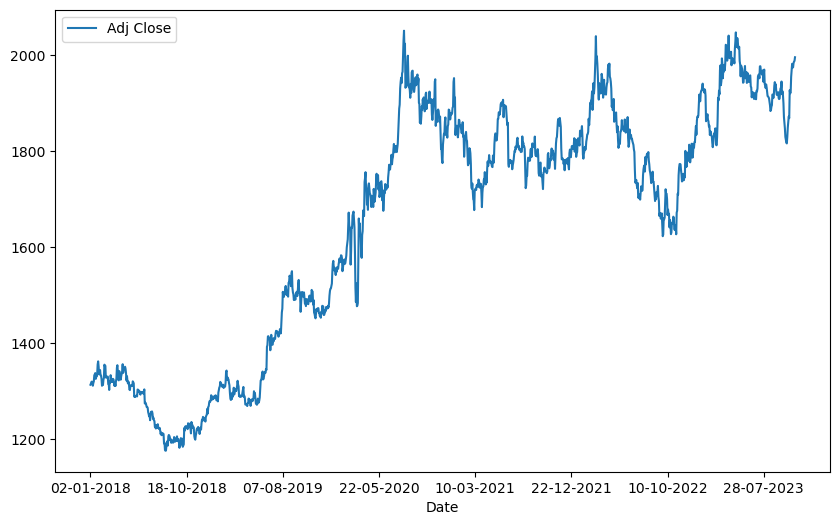

In [4]:
data.plot(figsize=(10, 6));

<Axes: xlabel='Date'>

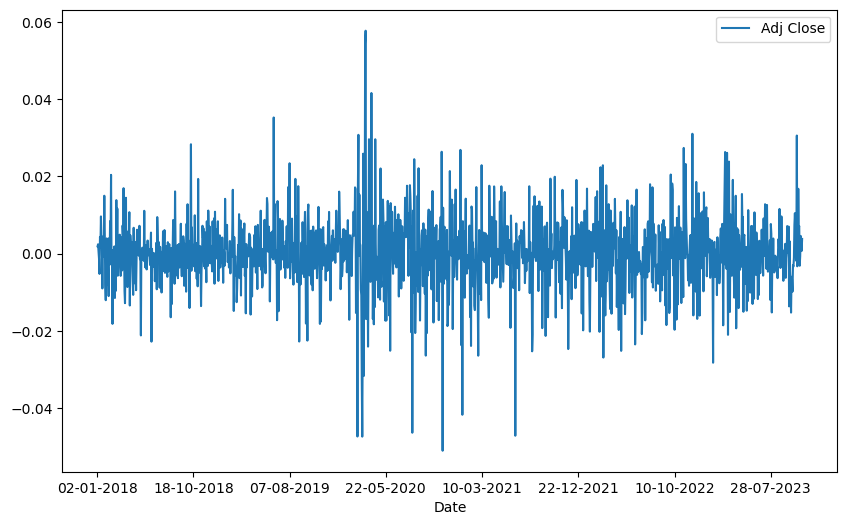

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

Adj Close    0.000286
dtype: float64

In [7]:
var = log_returns.var()
var

Adj Close    0.000089
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

Adj Close    0.000241
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

Adj Close    0.009445
dtype: float64

In [11]:
type(drift), drift.values

(pandas.core.series.Series, array([0.000241]))

In [12]:
type(stdev), stdev.values

(pandas.core.series.Series, array([0.00944452]))

In [13]:
t_intervals = 250
iterations = 10

In [14]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.01175894, 1.00145957, 0.98660356, ..., 1.00538775, 0.99556541,
        1.00141682],
       [1.00030398, 1.0174888 , 0.99329173, ..., 0.99840372, 0.97755371,
        0.98995517],
       [0.98979718, 1.01367874, 1.02409288, ..., 0.9984336 , 0.9922622 ,
        1.00498642],
       ...,
       [1.01416275, 0.99964319, 0.97879613, ..., 0.98834833, 0.98699128,
        1.00368383],
       [0.99621703, 0.99000647, 0.99543543, ..., 1.00381243, 1.00425668,
        0.98250458],
       [0.9944131 , 0.99606653, 1.00795289, ..., 0.97186646, 1.00596439,
        1.00278157]])

In [15]:
data.iloc[-1]

Adj Close    1996.199951
Name: 30-10-2023, dtype: float64

In [16]:
S0 = data.iloc[-1]
S0

Adj Close    1996.199951
Name: 30-10-2023, dtype: float64

In [17]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
price_list[0] = S0
price_list

array([[1996.199951, 1996.199951, 1996.199951, ..., 1996.199951,
        1996.199951, 1996.199951],
       [   0.      ,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [   0.      ,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       ...,
       [   0.      ,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [   0.      ,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [   0.      ,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ]])

In [19]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

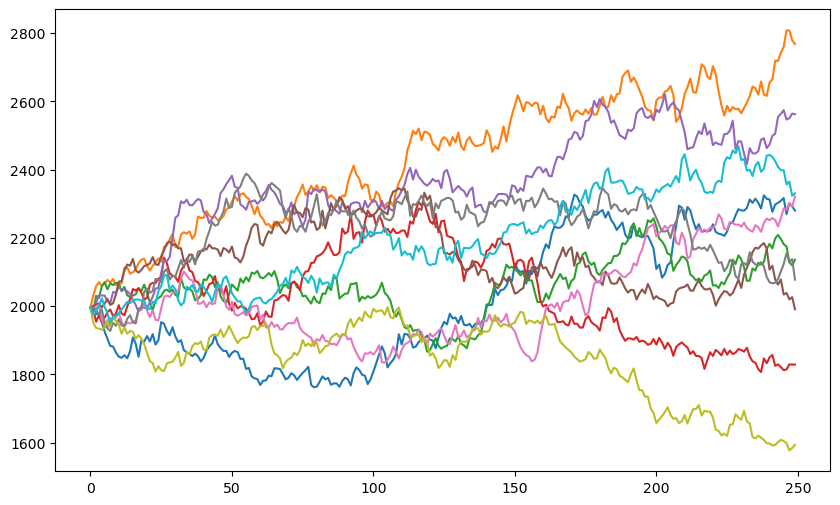

In [20]:
plt.figure(figsize=(10,6))
plt.plot(price_list);